In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

In [2]:
# read data from the link
df = pd.read_csv("https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


Insights to be drawn -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after 2015

● Draw plots to show the distribution between city and electric vehicle type

In [24]:
# 1-> Get all the cars and their types that do not qualify for clean alternative fuel vehicle


# Filter cars that do not qualify for clean alternative fuel vehicles
not_qualify = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']!='Clean Alternative Fuel Vehicle Eligible']

# Get the list of non-clean cars and their types
non_clean_car_types = not_qualify.groupby(['Make','Electric Vehicle Type']).size().reset_index(name="No of Cars")

# Display the result
print("Cars that do not qualify for clean alternative fuel vehicles:")
non_clean_car_types


Cars that do not qualify for clean alternative fuel vehicles:


,Make,Electric Vehicle Type,No of Cars
0,AUDI,Battery Electric Vehicle (BEV),727
1,AUDI,Plug-in Hybrid Electric Vehicle (PHEV),1286
2,BENTLEY,Plug-in Hybrid Electric Vehicle (PHEV),3
3,BMW,Battery Electric Vehicle (BEV),762
4,BMW,Plug-in Hybrid Electric Vehicle (PHEV),1713
5,CADILLAC,Battery Electric Vehicle (BEV),17
6,CHEVROLET,Battery Electric Vehicle (BEV),2597
7,FORD,Battery Electric Vehicle (BEV),2829
8,FORD,Plug-in Hybrid Electric Vehicle (PHEV),3370
9,GENESIS,Battery Electric Vehicle (BEV),54


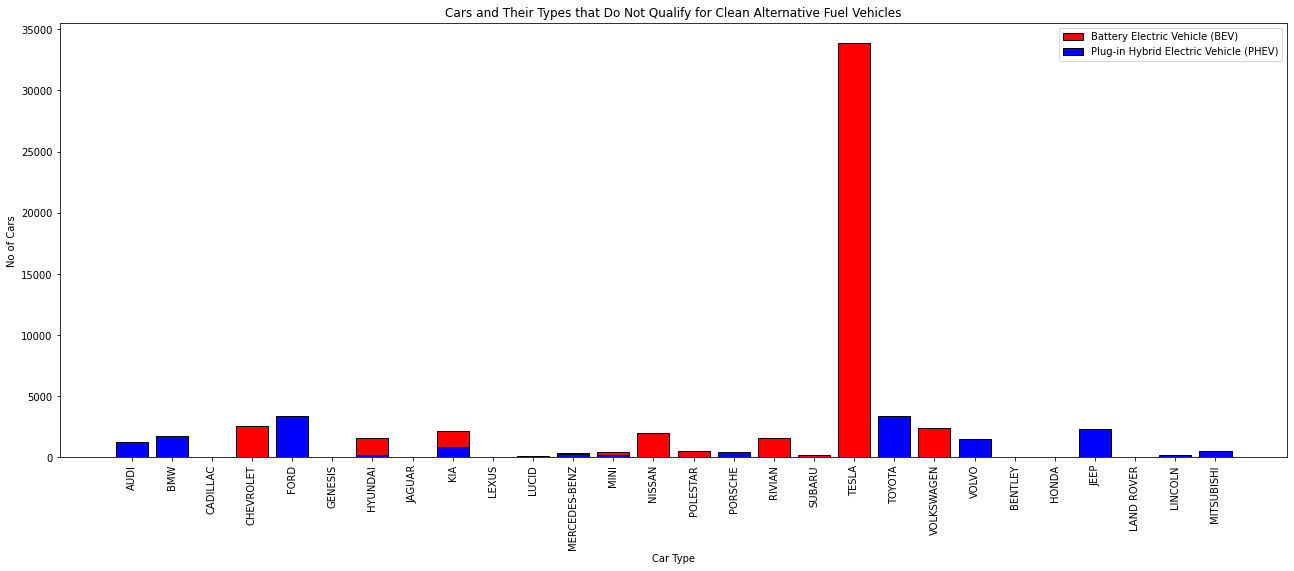

In [66]:
#Graph analysis to the cars and their types that do not qualify for clean alternative fuel vehicle

#filter based on Battery Electric Vehicle (BEV)
data_1  = non_clean_car_types[non_clean_car_types['Electric Vehicle Type']=='Battery Electric Vehicle (BEV)']
data_2 = non_clean_car_types[non_clean_car_types['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']
plt.figure(figsize=(22,8))
plt.bar(data_1['Make'],data_1['No of Cars'],color='red', edgecolor='black',label='Battery Electric Vehicle (BEV)')
plt.bar(data_2['Make'],data_2['No of Cars'],color='blue', edgecolor='black',label='Plug-in Hybrid Electric Vehicle (PHEV)')
plt.xlabel("Car Type")
plt.ylabel("No of Cars")
plt.title("Cars and Their Types that Do Not Qualify for Clean Alternative Fuel Vehicles")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [52]:
#2-> Get all TESLA cars with the model year, and model type made in Bothell City.

#filter tesla data
tesla_data = df[df['Make']=='TESLA']

#filter tesla data with Bothell City
filtered_data = tesla_data[tesla_data['City']=='Bothell']

# Extract the model year and model type
tesla_bothell_data = filtered_data[["Model Year", "Model"]]

# Count the occurrences of each model year and model type
tesla_bothell_counts = tesla_bothell_data.value_counts().reset_index(name="Counts")

print("TESLA cars with the model year, and model type made in Bothell City-")
tesla_bothell_counts

TESLA cars with the model year, and model type made in Bothell City-


,Model Year,Model,Counts
0,2022,MODEL Y,400
1,2023,MODEL Y,362
2,2021,MODEL Y,313
3,2018,MODEL 3,214
4,2022,MODEL 3,185
5,2019,MODEL 3,153
6,2020,MODEL 3,133
7,2021,MODEL 3,113
8,2023,MODEL 3,111
9,2020,MODEL Y,72


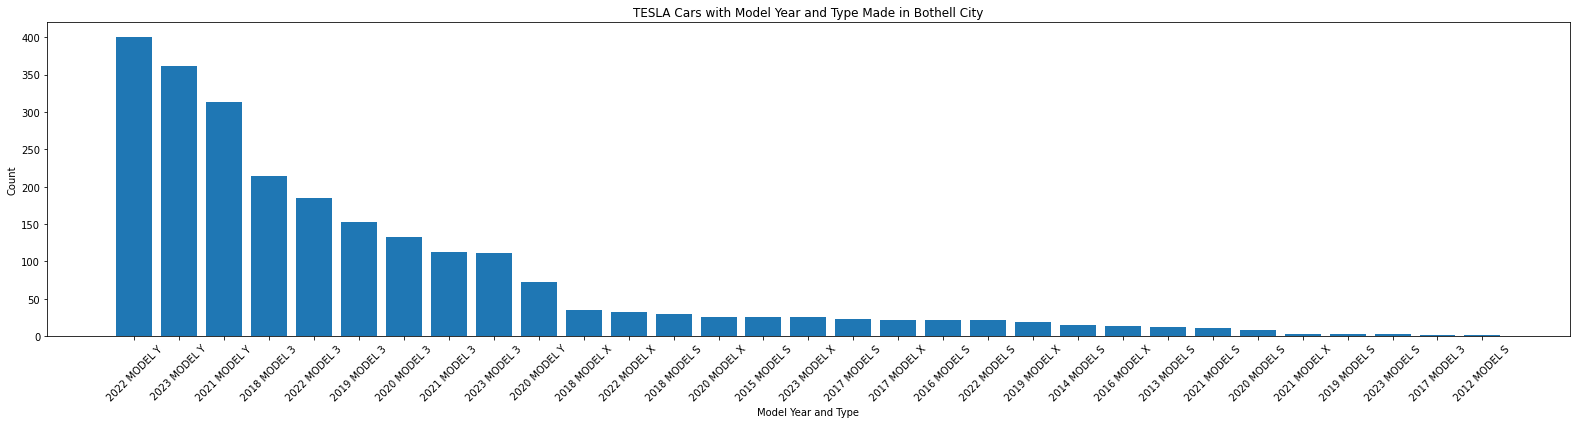

In [63]:
# Plot the graph
plt.figure(figsize=(22, 6))
plt.bar(tesla_bothell_counts["Model Year"].astype(str) + " " + tesla_bothell_counts["Model"], tesla_bothell_counts["Counts"])
plt.xlabel("Model Year and Type")
plt.ylabel("Count")
plt.title("TESLA Cars with Model Year and Type Made in Bothell City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
#Get all the cars that have an electric range of more than 100, and were made after 2015

#filter cars_data whose range > 100 and year >2015
filter_data = df[df['Electric Range']>100]
filter_data = filter_data[filter_data['Model Year']>2015]

#cars that have an electric range of more than 100, and were made after 2015
filter_cars = filter_data[['Make','Electric Range','Model Year']].value_counts().reset_index(name="Counts")
filter_cars

,Make,Electric Range,Model Year,Counts
0,TESLA,215,2018,6226
1,TESLA,220,2019,4064
2,TESLA,291,2020,2379
3,TESLA,322,2020,1697
4,TESLA,266,2020,1444
5,NISSAN,150,2019,1398
6,CHEVROLET,238,2017,1302
7,NISSAN,151,2018,1230
8,TESLA,210,2016,971
9,NISSAN,107,2017,942


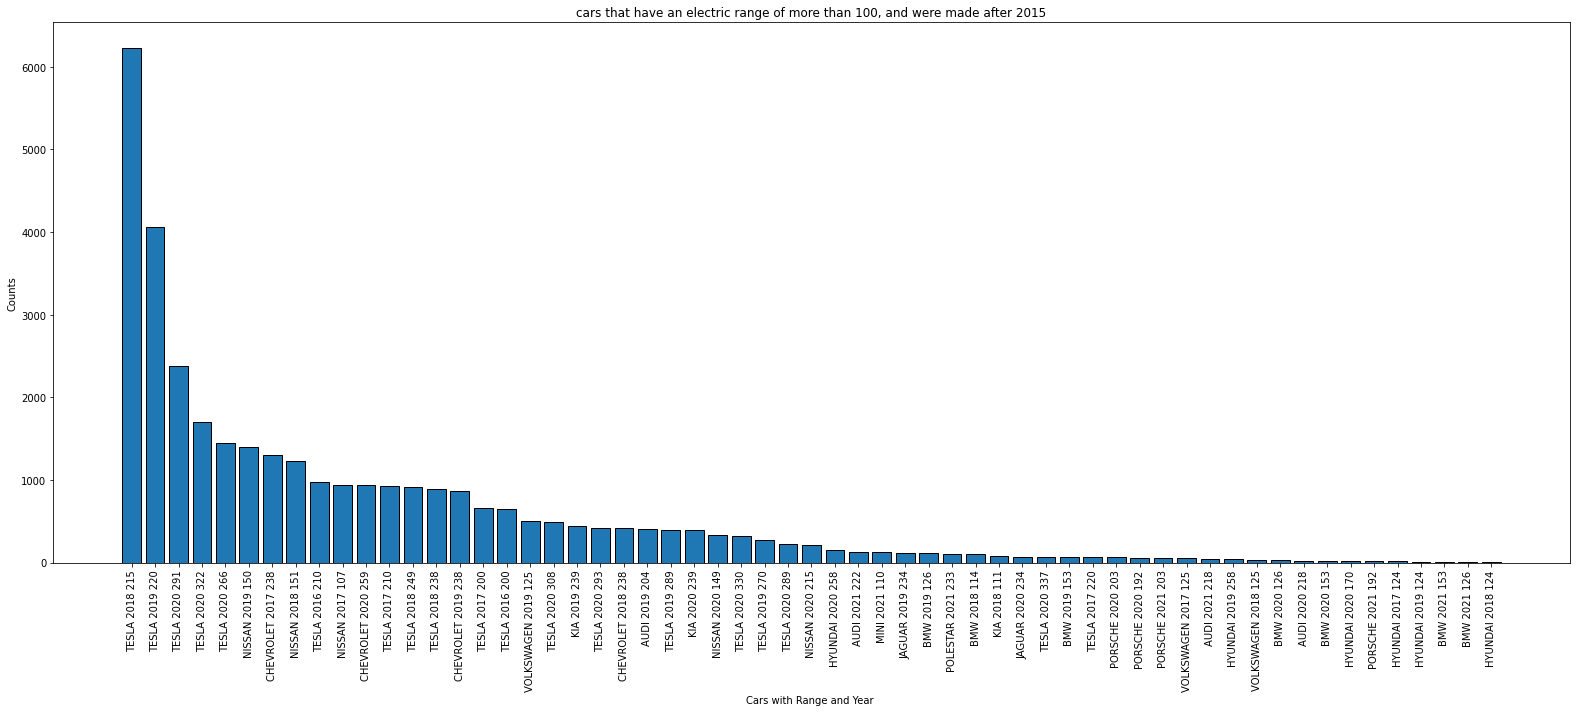

In [82]:
#Plot the graph
plt.figure(figsize=(22, 10))
plt.bar(filter_cars["Make"].astype(str) + " " + filter_cars["Model Year"].astype(str) + " " +filter_cars['Electric Range'].astype(str), filter_cars["Counts"],edgecolor="black")
plt.xlabel("Cars with Range and Year ")
plt.ylabel("Counts")
plt.title("cars that have an electric range of more than 100, and were made after 2015")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-97-4a0bbdfc2adb>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


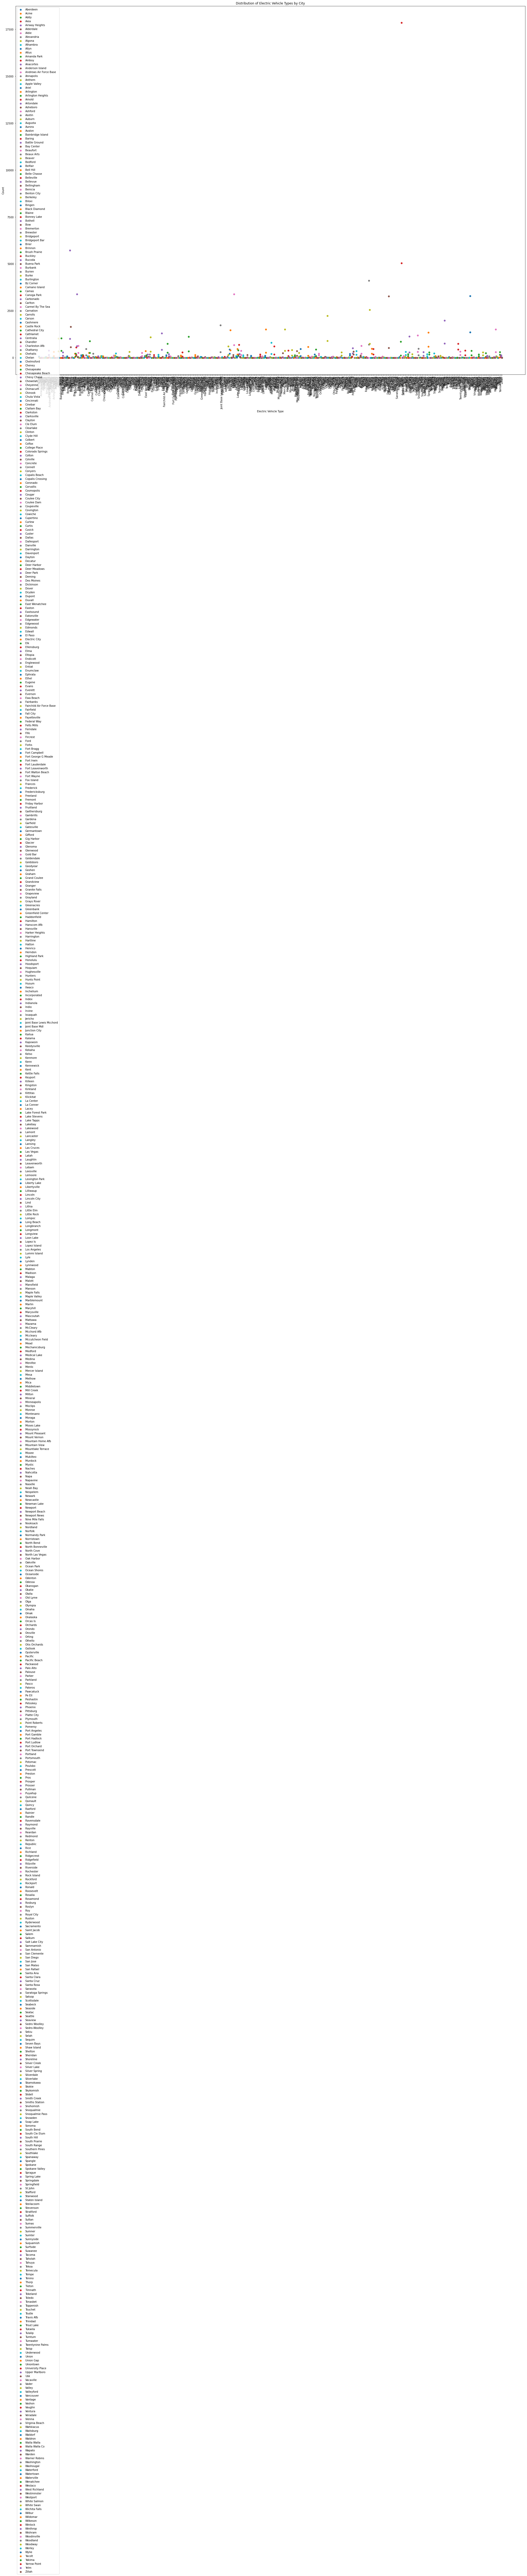

In [97]:
#4->  Draw plots to show the distribution between city and electric vehicle type

# Group the data by city and electric vehicle type and count the occurrences
city_ev_counts = df.groupby(["City", "Electric Vehicle Type"]).size().reset_index(name="Count")

# Plot the distribution between city and electric vehicle type
plt.figure(figsize=(35, 26))
for city in city_ev_counts["City"].unique():
    city_data = city_ev_counts[city_ev_counts["City"] == city]
    plt.scatter(city_data["City"], city_data["Count"], label=city)

plt.xlabel("Electric Vehicle Type")
plt.ylabel("Count")
plt.title("Distribution of Electric Vehicle Types by City")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()